# Part 1: Exploratory Data Analysis

Describe the data set sufficiently using the methods and visualizations that we used previously.  Include any output, graphs, tables, that you think is necessary to represent the data.  Label your figures and axes. DO NOT INCLUDE CODE, only output figures!

In [59]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import sys

In [60]:
#read data from local data repository
hw5_treasury = pd.read_csv("D:/UIUC_Course/Machine Learning/Homework05//hw5_treasury yield curve data.csv")
#hw5_treasury=hw5_treasury.drop(columns=['Date'])

In [61]:
print("The size of hw5_treasury yield curve data.csv is" )
print(hw5_treasury.shape)

The size of hw5_treasury yield curve data.csv is
(8635, 32)


In [62]:
df_treasury=hw5_treasury.drop(columns=['Date'])
df_treasury=pd.DataFrame(df_treasury)
print("After drop the 'Date' Column, the size is" )
print(df_treasury.shape)
print(df_treasury.head())

After drop the 'Date' Column, the size is
(8635, 31)
   SVENF01  SVENF02  SVENF03  SVENF04  SVENF05  SVENF06  SVENF07  SVENF08  \
0   2.1224   2.0266   2.1023   2.2377   2.3790   2.5042   2.6069   2.6885   
1   2.1239   2.0317   2.1096   2.2468   2.3901   2.5171   2.6217   2.7049   
2   2.0874   1.9956   2.0844   2.2289   2.3736   2.4980   2.5984   2.6779   
3   2.1319   2.0559   2.1451   2.2856   2.4257   2.5461   2.6428   2.7188   
4   2.1051   2.0234   2.1180   2.2632   2.4051   2.5248   2.6198   2.6940   

   SVENF09  SVENF10  ...  SVENF22  SVENF23  SVENF24  SVENF25  SVENF26  \
0   2.7530   2.8054  ...   3.3355   3.3876   3.4400   3.4925   3.5446   
1   2.7710   2.8247  ...   3.3574   3.4091   3.4610   3.5130   3.5646   
2   2.7418   2.7951  ...   3.3589   3.4086   3.4575   3.5055   3.5524   
3   2.7791   2.8289  ...   3.3940   3.4485   3.5029   3.5568   3.6099   
4   2.7532   2.8029  ...   3.3712   3.4227   3.4735   3.5234   3.5722   

   SVENF27  SVENF28  SVENF29  SVENF30  Adj_Cl

In [63]:
print("Check if NaN exists:")
print(np.isnan(df_treasury).any())
df_treasury.dropna(inplace=True)
print("Delete the row where NaN exists and check again:")
print(np.isnan(df_treasury).any())
print("Now the size of df_treasury is" )
print(df_treasury.shape)

Check if NaN exists:
SVENF01      True
SVENF02      True
SVENF03      True
SVENF04      True
SVENF05      True
SVENF06      True
SVENF07      True
SVENF08      True
SVENF09      True
SVENF10      True
SVENF11      True
SVENF12      True
SVENF13      True
SVENF14      True
SVENF15      True
SVENF16      True
SVENF17      True
SVENF18      True
SVENF19      True
SVENF20      True
SVENF21      True
SVENF22      True
SVENF23      True
SVENF24      True
SVENF25      True
SVENF26      True
SVENF27      True
SVENF28      True
SVENF29      True
SVENF30      True
Adj_Close    True
dtype: bool
Delete the row where NaN exists and check again:
SVENF01      False
SVENF02      False
SVENF03      False
SVENF04      False
SVENF05      False
SVENF06      False
SVENF07      False
SVENF08      False
SVENF09      False
SVENF10      False
SVENF11      False
SVENF12      False
SVENF13      False
SVENF14      False
SVENF15      False
SVENF16      False
SVENF17      False
SVENF18      False
SVENF19      False

In [64]:
df_treasury.head()

SVENF01  SVENF02  SVENF03  SVENF04  SVENF05  SVENF06  SVENF07  SVENF08  \
0   2.1224   2.0266   2.1023   2.2377   2.3790   2.5042   2.6069   2.6885   
1   2.1239   2.0317   2.1096   2.2468   2.3901   2.5171   2.6217   2.7049   
2   2.0874   1.9956   2.0844   2.2289   2.3736   2.4980   2.5984   2.6779   
3   2.1319   2.0559   2.1451   2.2856   2.4257   2.5461   2.6428   2.7188   
4   2.1051   2.0234   2.1180   2.2632   2.4051   2.5248   2.6198   2.6940   

   SVENF09  SVENF10  ...  SVENF22  SVENF23  SVENF24  SVENF25  SVENF26  \
0   2.7530   2.8054  ...   3.3355   3.3876   3.4400   3.4925   3.5446   
1   2.7710   2.8247  ...   3.3574   3.4091   3.4610   3.5130   3.5646   
2   2.7418   2.7951  ...   3.3589   3.4086   3.4575   3.5055   3.5524   
3   2.7791   2.8289  ...   3.3940   3.4485   3.5029   3.5568   3.6099   
4   2.7532   2.8029  ...   3.3712   3.4227   3.4735   3.5234   3.5722   

   SVENF27  SVENF28  SVENF29  SVENF30  Adj_Close  
0   3.5962   3.6471   3.6970   3.7458  10.130177  
1   3.6156   3.6660   3.7153   3.7636  10.130177  
2   3.5980   3.6421   3.6847   3.7257  10.150118  
3   3.6622   3.7132   3.7630   3.8113  10.130177  
4   3.6196   3.6655   3.7098   3.7525  10.130177  

[5 rows x 31 columns]

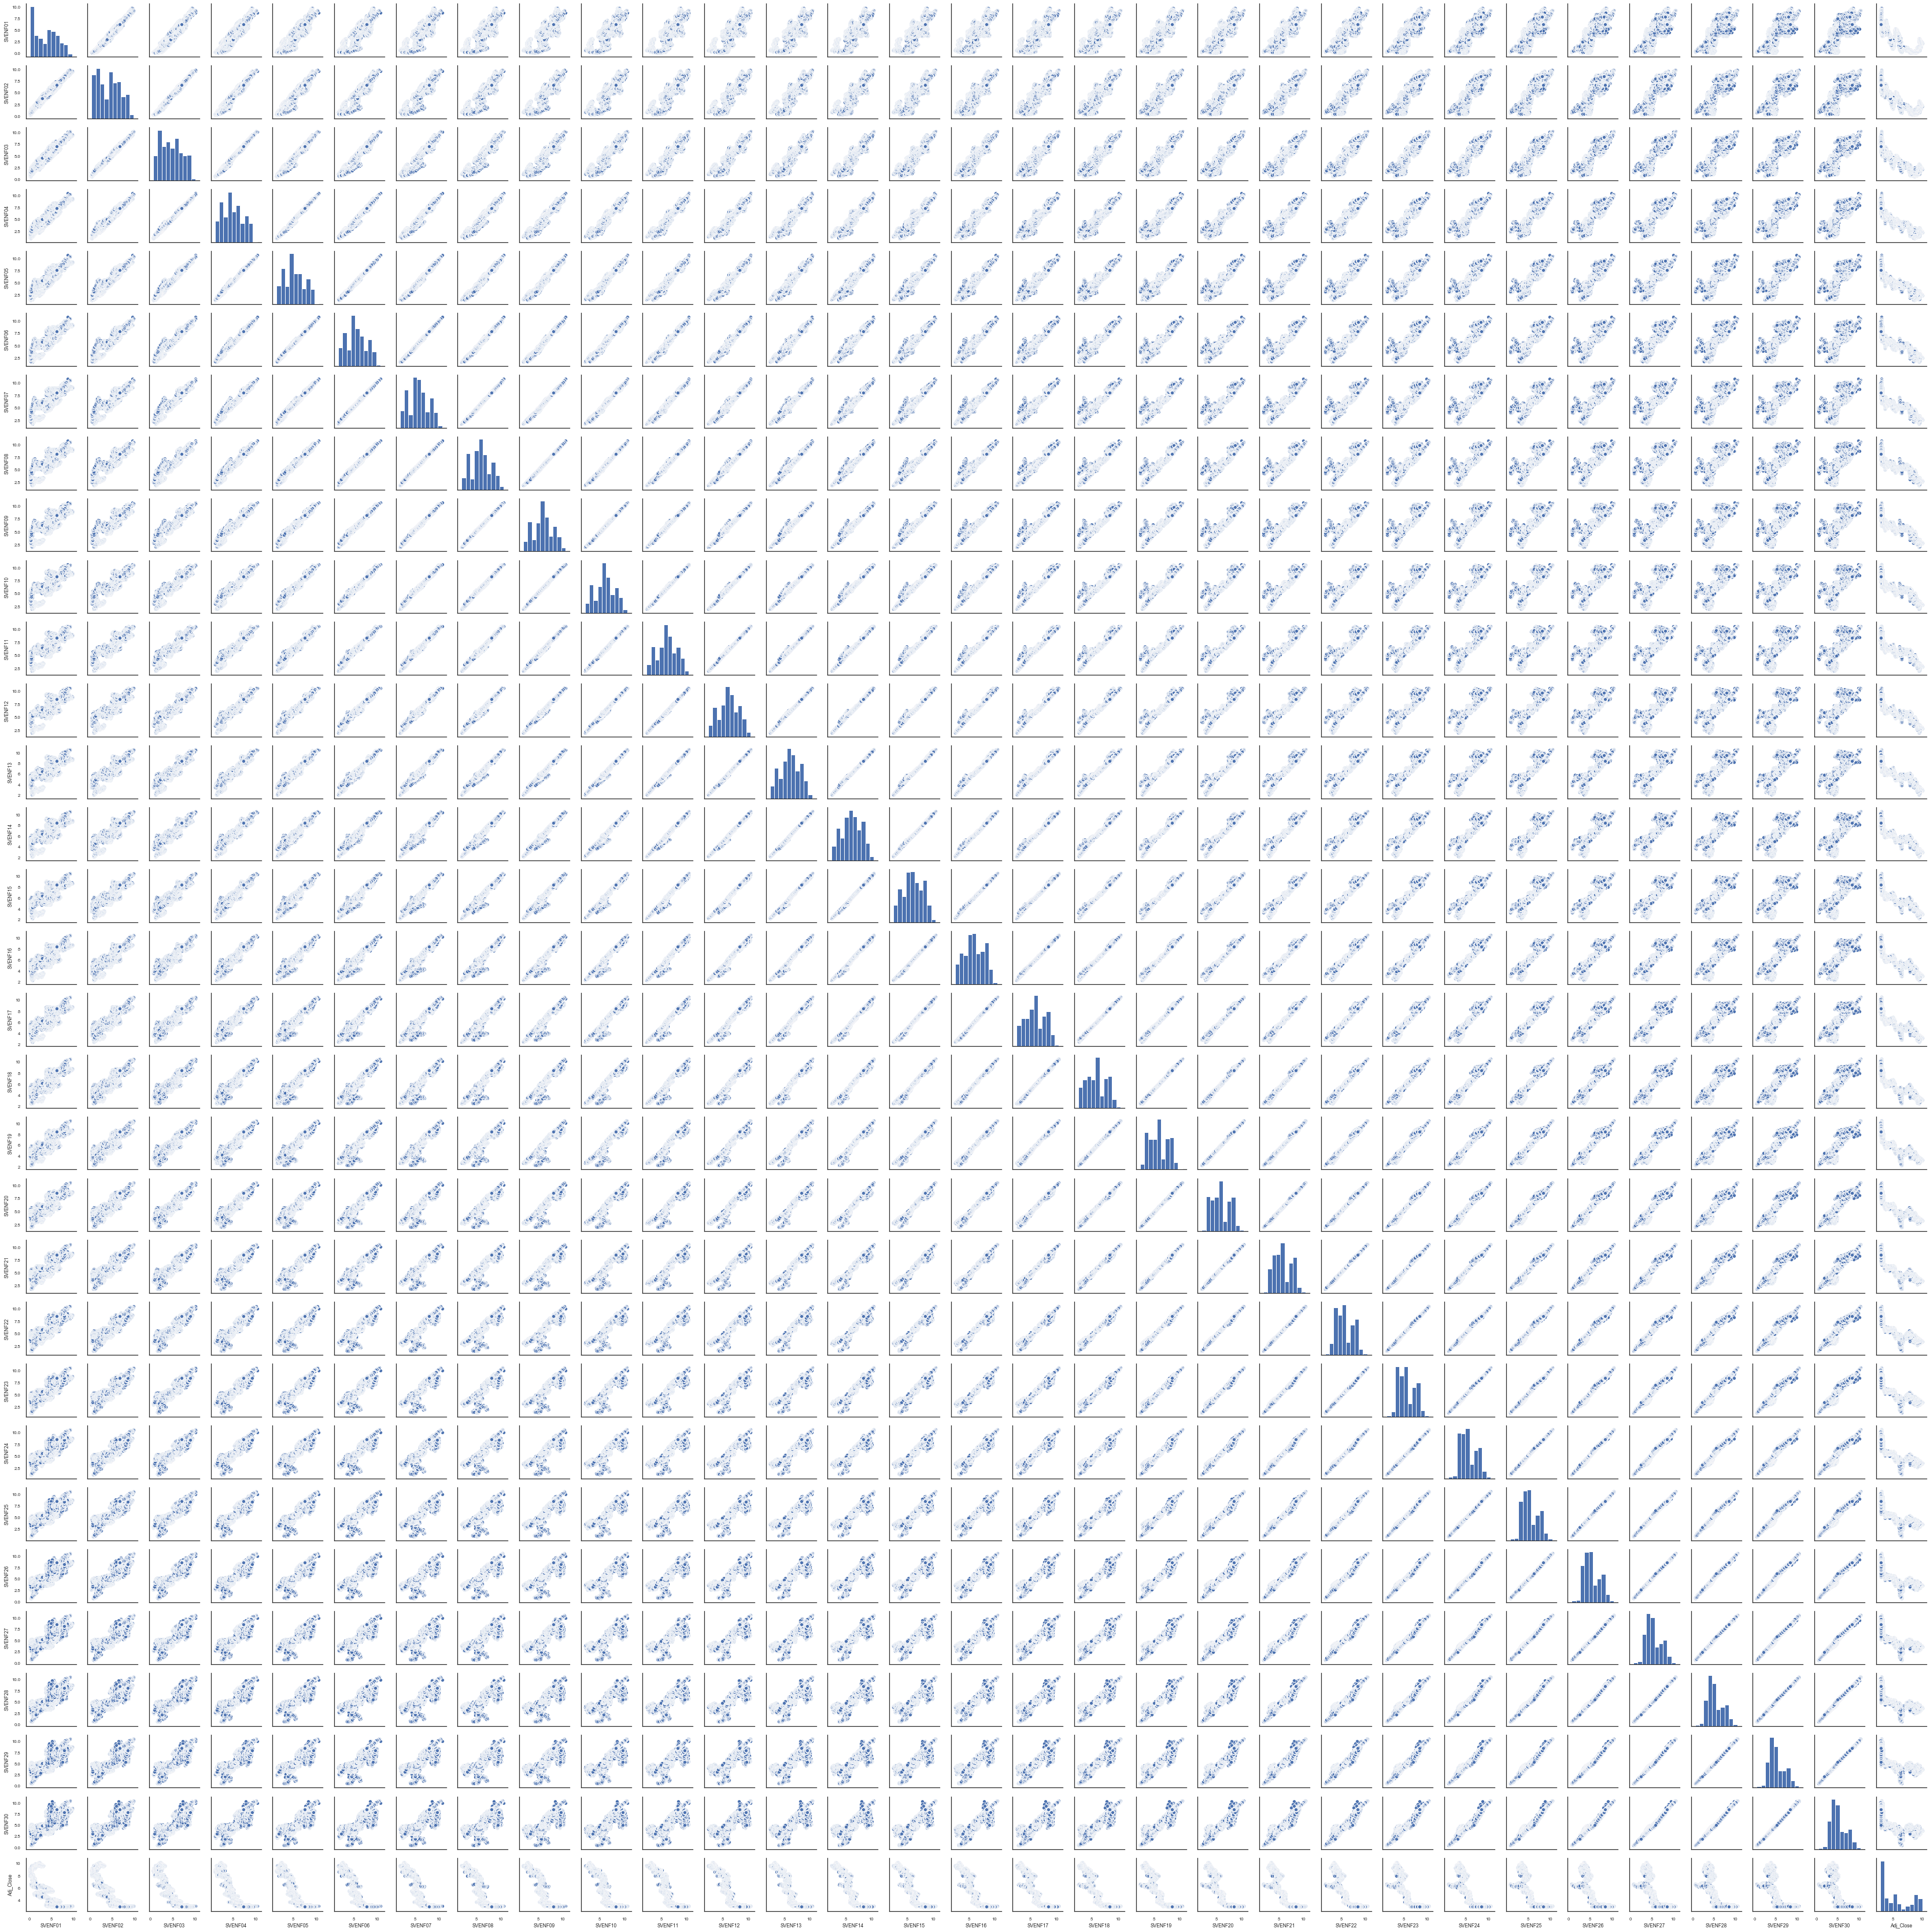

In [93]:
cols = ['SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVENF05', 'SVENF06', 'SVENF07', 'SVENF08', 'SVENF09', 'SVENF10', 'SVENF11', 'SVENF12', 'SVENF13', 'SVENF14', 'SVENF15', 'SVENF16', 'SVENF17', 'SVENF18', 'SVENF19', 'SVENF20', 'SVENF21', 'SVENF22', 'SVENF23', 'SVENF24', 'SVENF25', 'SVENF26', 'SVENF27', 'SVENF28', 'SVENF29', 'SVENF30', 'Adj_Close']
sns.pairplot(df_treasury[cols], height=1.5)


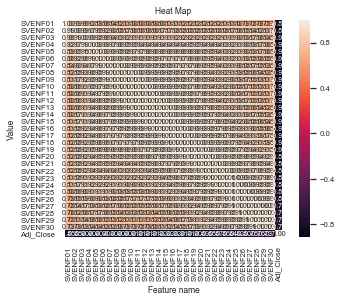

In [94]:
cm = np.corrcoef(df_treasury[cols].values.T)
sns.set(font_scale=0.7)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f',annot_kws={'size': 7}, yticklabels=cols,xticklabels=cols)
plt.xlabel('Feature name')
plt.ylabel('Value')
plt.title('Heat Map')
plt.show()

In [95]:
#print summary of data frame
summary = df_treasury.describe()
print("Statistic Description of df_treasury:")
print(summary)

Statistic Description of df_treasury:
           SVENF01      SVENF02      SVENF03      SVENF04      SVENF05  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000   
mean      3.785311     4.258972     4.669363     5.022430     5.318493   
std       2.648060     2.498137     2.341348     2.221632     2.137801   
min       0.072700     0.327300     0.630300     1.013000     1.424500   
25%       1.144050     1.865600     2.536550     3.023050     3.544700   
50%       3.986500     4.393300     4.505500     4.718900     5.051300   
75%       5.901500     6.221250     6.461300     6.626600     6.779550   
max       9.813800     9.887800    10.145600    10.459900    10.649900   

           SVENF06      SVENF07      SVENF08      SVENF09      SVENF10  ...  \
count  8071.000000  8071.000000  8071.000000  8071.000000  8071.000000  ...   
mean      5.559644     5.750071     5.895135     6.000596     6.072112  ...   
std       2.080405     2.040337     2.010786     1.987244 

In [96]:
ncol=df_treasury.shape[1]
nrow=df_treasury.shape[0]
#print(nrow,ncol)
print("The number of values in each feature:")
type = [0]*3
colCounts = []

for col in range(ncol):
    for row in range(nrow):
        try:
            a = float(df_treasury.iloc[row,col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(df.iloc[row,col]) > 0:
                type[1] += 1
            else:
                type[2] += 1
    colCounts.append(type)
    type = [0]*3
sys.stdout.write("Col#" + '\t' + "Number" + '\t' + "Strings" + '\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t' + str(types[0]) + '\t' + str(types[1]) + '\t' + str(types[2]) + '\n')
    iCol += 1
    sys.stdout.write('\n')

The number of values in each feature:
Col#	Number	Strings	 Other
0	8071	0	0

1	8071	0	0

2	8071	0	0

3	8071	0	0

4	8071	0	0

5	8071	0	0

6	8071	0	0

7	8071	0	0

8	8071	0	0

9	8071	0	0

10	8071	0	0

11	8071	0	0

12	8071	0	0

13	8071	0	0

14	8071	0	0

15	8071	0	0

16	8071	0	0

17	8071	0	0

18	8071	0	0

19	8071	0	0

20	8071	0	0

21	8071	0	0

22	8071	0	0

23	8071	0	0

24	8071	0	0

25	8071	0	0

26	8071	0	0

27	8071	0	0

28	8071	0	0

29	8071	0	0

30	8071	0	0



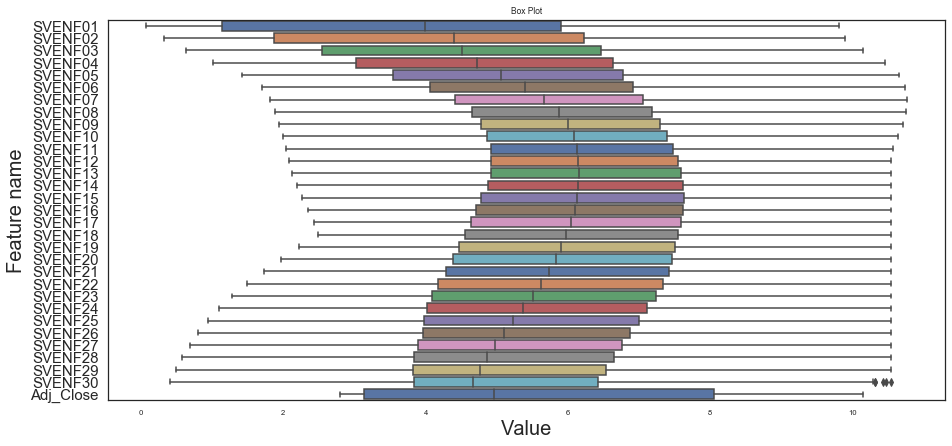

In [97]:
plt.figure(figsize=(15,7))
sns.set_style("white")
sns.boxplot(data=df_treasury, palette="deep",orient='h')
plt.ylabel('Feature name',fontsize=20.0)
plt.xlabel('Value',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.title('Box Plot')
plt.show()

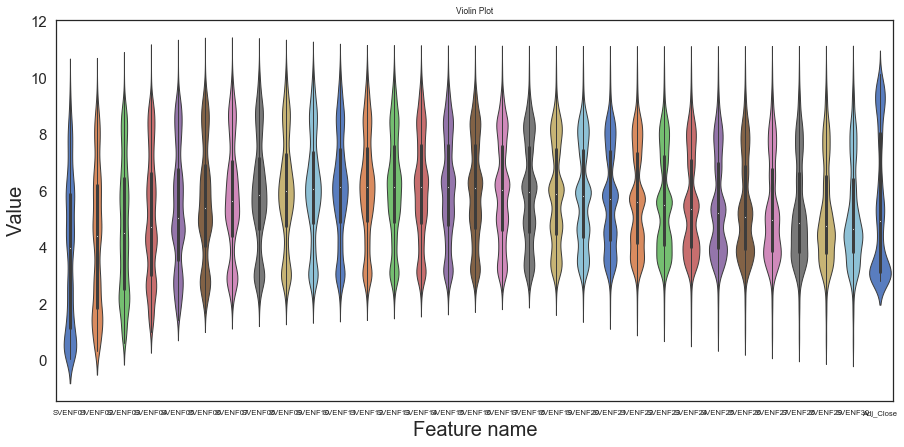

In [98]:
plt.figure(figsize=(15,7))
sns.violinplot(data=df_treasury,split=True,linewidth =1,width = 0.8,palette = 'muted')
plt.xlabel('Feature name',fontsize=20.0)
plt.ylabel('Value',fontsize=20.0)
plt.title('Violin Plot')
plt.yticks(fontsize=15.0)
plt.show()

# Part 2: Perform a PCA on the Treasury Yield dataset

Split data into training and test sets.  Use random_state = 42. Use 85% of the data for the training set.  Use the same split for all experiments.

Compute and display the explained variance ratio for all components, then recalculate and display on n_components=3.
What is the cumulative explained variance of the 3 component version.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [127]:
X = df_treasury.iloc[:,:-1].values
y = df_treasury.iloc[:,-1].values.flatten()
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=42)

#standardize
sc = StandardScaler()
#X_std=sc.fit_transform(X)
#y_std = sc.transform(y.reshape(-1, 1))
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [67]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' %eigen_vals)


Eigenvalues 
[2.79579848e+01 1.22313057e+00 6.55411544e-01 1.45561136e-01
 1.99031388e-02 2.06243818e-03 2.84492074e-04 3.29679042e-05
 2.55310505e-06 2.02358034e-07 1.41807229e-08 1.14065185e-09
 1.87834481e-10 2.79223231e-10 1.97434721e-10 2.08170687e-10
 2.16456169e-10 2.61581763e-10 2.21833017e-10 2.26976024e-10
 2.24866645e-10 2.31123891e-10 2.57846191e-10 2.56092787e-10
 2.35379959e-10 2.52582535e-10 2.49758480e-10 2.38344221e-10
 2.43769611e-10 2.44978383e-10]


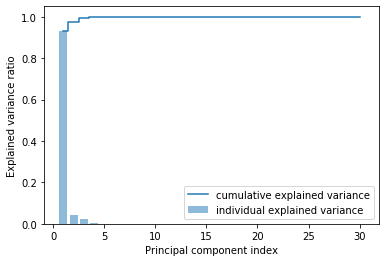

explained variance ratio of all 30 components:
[9.25027254e-01 3.77198563e-02 3.11962115e-02 5.11829721e-03
 8.45006479e-04 8.14071111e-05 1.06386900e-05 1.23073879e-06
 8.99497477e-08 7.14094977e-09 4.89071592e-10 3.83422436e-11
 8.63162713e-12 7.54060102e-12 7.44722038e-12 7.41409677e-12
 7.37633844e-12 7.36922042e-12 7.21033060e-12 7.16011018e-12
 7.08499808e-12 7.01615861e-12 6.97953948e-12 6.83297854e-12
 6.78790385e-12 6.76011093e-12 6.68796631e-12 6.63106214e-12
 6.57322725e-12 6.42225375e-12]
explained variance of all 30 components:
[1.07902835e+02 4.39995625e+00 3.63898432e+00 5.97040551e-01
 9.85685500e-02 9.49599926e-03 1.24098486e-03 1.43563560e-04
 1.04924831e-05 8.32979488e-07 5.70493586e-08 4.47255665e-09
 1.00686443e-09 8.79598117e-10 8.68705426e-10 8.64841615e-10
 8.60437170e-10 8.59606866e-10 8.41072642e-10 8.35214516e-10
 8.26452819e-10 8.18422814e-10 8.14151256e-10 7.97055174e-10
 7.91797289e-10 7.88555294e-10 7.80139748e-10 7.73501973e-10
 7.66755634e-10 7.49144835

In [68]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,31), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,31), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

pca = PCA(n_components=30)
pca.fit(X)
print("explained variance ratio of all 30 components:")
print (pca.explained_variance_ratio_)
print("explained variance of all 30 components:")
print (pca.explained_variance_)

In [69]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [230]:
pca = PCA(n_components=3)
pca.fit(X)
culratio = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2]
culvar = pca.explained_variance_[0] + pca.explained_variance_[1] + pca.explained_variance_[2]
print("explained variance ratio of 3 components:")
print (pca.explained_variance_ratio_)
print('The cumulative explained variance ratio of 3 components is ' + str(culratio) + '.')

print("explained variance of 3 components:")
print (pca.explained_variance_)
print('The cumulative explained variance of the 3 components is ' + str(culvar) + '.')

explained variance ratio of 3 components:
[0.92502725 0.03771986 0.03119621]
The cumulative explained variance ratio of 3 components is 0.9939433220224666.
explained variance of 3 components:
[107.90283548   4.39995625   3.63898432]
The cumulative explained variance of the 3 components is 115.94177605261858.


# Part 3: Linear Regression  v. SVR - baseline

Fit a linear classifier model to both datasets (the original dataset with 30 attributes and the PCA transformed dataset with 3 PCs.) using SKlearn.  Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  (You may use CV accuracy score if you wish).
Fit a SVM regressor model to both datasets using SKlearn.  Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  (You may use CV accuracy score if you wish).

## Linear Regression without PCA

In [129]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [130]:
slr_sgd = SGDRegressor(loss='squared_loss', penalty=None, random_state=42)
X = df_treasury.iloc[:,:-1].values
y = df_treasury['Adj_Close'].values.ravel()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=42)

#standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#y_train_std=sc.fit_transform(y_train)
#y_test_std = sc.transform(y_test)
y_train_std = sc.fit_transform(y_train.reshape(-1, 1))
y_test_std = sc.transform(y_test.reshape(-1, 1))

In [152]:
def train_and_evaluate(clf, X_train, y_train, X_test,y_test):
    clf.fit(X_train, y_train)
    # Predict on the train data: y_pred
    y_train_pred = clf.predict(X_train)
    # Predict on the test data: y_pred
    y_test_pred = clf.predict(X_test)
    
    print('MSE train: %.9f, test: %.9f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
    print('R^2 train: %.9f, test: %.9f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
    print('Coefficient of determination on training set:' + str(clf.coef_))
    print('Intercept:' + str(clf.intercept_))
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold cross_validation:" + str(np.mean(scores)))

In [135]:
# Fit the regressor to the training data
slr_sgd.fit(X_train_std,y_train_std)


# Predict on the test data: y_pred
y_test_pred = slr_sgd.predict(X_test_std)

# Predict on the train data: y_pred
y_train_pred = slr_sgd.predict(X_train_std)

print('MSE train: %.9f, test: %.9f' % (mean_squared_error(y_train_std, y_train_pred),mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.9f, test: %.9f' % (r2_score(y_train_std, y_train_pred),r2_score(y_test_std, y_test_pred)))
print('Coefficient of determination on training set:' + str(slr_sgd.coef_))
#print('Slope: %.3f' %slr_sgd.coef_[0])
#print('Slope:' + str(slr_sgd.coef_[0]))
print('Intercept:' + str(slr_sgd.intercept_))

cv = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(slr_sgd, X_train_std, y_train_std, cv=cv)
print ("Average coefficient of determination using 5-fold cross_validation:" + str(np.mean(scores)))


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 0.115121056, test: 0.119599844
R^2 train: 0.884878944, test: 0.884382099
Coefficient of determination on training set:[-0.18273529 -0.16985102 -0.10003318 -0.02035722  0.03533062  0.06056561
  0.06119481  0.04590169  0.02221111 -0.00454344 -0.03099742 -0.05517043
 -0.07602184 -0.09303559 -0.10598061 -0.11475777 -0.11934493 -0.11970745
 -0.11586292 -0.10781444 -0.09561586 -0.07936309 -0.05918959 -0.03531412
 -0.00798982  0.02247205  0.05568762  0.09128418  0.12882548  0.16792252]
Intercept:[-0.00086723]


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Average coefficient of determination using 5-fold cross_validation:0.8875532753955102


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
train_and_evaluate(slr_sgd,X_train_std,y_train_std,X_test_std,y_test_std)


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 0.115121056, test: 0.119599844
R^2 train: 0.884878944, test: 0.884382099
Coefficient of determination on training set:[-0.18273529 -0.16985102 -0.10003318 -0.02035722  0.03533062  0.06056561
  0.06119481  0.04590169  0.02221111 -0.00454344 -0.03099742 -0.05517043
 -0.07602184 -0.09303559 -0.10598061 -0.11475777 -0.11934493 -0.11970745
 -0.11586292 -0.10781444 -0.09561586 -0.07936309 -0.05918959 -0.03531412
 -0.00798982  0.02247205  0.05568762  0.09128418  0.12882548  0.16792252]
Intercept:[-0.00086723]
Average coefficient of determination using 5-fold cross_validation:0.8875532753955102


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Linear Regresstion with PCA

In [163]:
from sklearn.decomposition import KernelPCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [164]:
# Fit the regressor to the training data
slr_sgd.fit(X_train_pca,y_train_std)

# Predict on the test data: y_pred
pca_y_test_pred = slr_sgd.predict(X_test_pca)

# Predict on the train data: y_pred
pca_y_train_pred = slr_sgd.predict(X_train_pca)

print('MSE train: %.9f, test: %.9f' % (mean_squared_error(y_train_std, pca_y_train_pred),
                                      mean_squared_error(y_test_std, pca_y_test_pred)))
print('R^2 train: %.9f, test: %.9f' % (r2_score(y_train_std, pca_y_train_pred),
                                       r2_score(y_test_std, pca_y_test_pred)))
print('Coefficient of determination on training set:' + str(slr_sgd.coef_))

print('Intercept:' + str(slr_sgd.intercept_))

cv = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(slr_sgd, X_train_pca, y_train_std, cv=cv)
print ("Average coefficient of determination using 5-fold cross_validation:" + str(np.mean(scores)))

D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

MSE train: 0.142025857, test: 0.146541090
R^2 train: 0.857974143, test: 0.858337831
Coefficient of determination on training set:[-0.18858199 -0.20507919  0.10220401]
Intercept:[-0.00266783]
Average coefficient of determination using 5-fold cross_validation:0.8647184575391759


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
train_and_evaluate(slr_sgd,X_train_pca,y_train_std,X_test_pca,y_test_std)

D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

MSE train: 0.142025857, test: 0.146541090
R^2 train: 0.857974143, test: 0.858337831
Coefficient of determination on training set:[-0.18858199 -0.20507919  0.10220401]
Intercept:[-0.00266783]
Average coefficient of determination using 5-fold cross_validation:0.8647184575391759


## SVR without PCA

Fit a SVM regressor model to both datasets using SKlearn.  Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  (You may use CV accuracy score if you wish).

In [166]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [167]:
clf_svr = svm.SVR(kernel='linear')

In [168]:
# Fit the regressor to the training data
clf_svr.fit(X_train_std,y_train_std)


# Predict on the test data: y_pred
y_test_pred = clf_svr.predict(X_test_std)

# Predict on the train data: y_pred
y_train_pred = clf_svr.predict(X_train_std)

print('MSE train: %.9f, test: %.9f' % (mean_squared_error(y_train_std, y_train_pred),mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.9f, test: %.9f' % (r2_score(y_train_std, y_train_pred),r2_score(y_test_std, y_test_pred)))
print('Coefficient of determination on training set:' + str(clf_svr.coef_))
#print('Slope: %.3f' %slr_sgd.coef_[0])
#print('Slope:' + str(slr_sgd.coef_[0]))
print('Intercept:' + str(clf_svr.intercept_))

cv = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(slr_sgd, X_train_std, y_train_std, cv=cv)
print ("Average coefficient of determination using 5-fold cross_validation:" + str(np.mean(scores)))

D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 0.106116907, test: 0.108971957
R^2 train: 0.893883093, test: 0.894656142
Coefficient of determination on training set:[[ 0.31923813 -0.27639627 -1.89417828 -0.05094413  1.38960287  1.50572018
   0.75263795 -0.21799587 -0.95984168 -1.29167324 -1.21953066 -0.84496903
  -0.31611027  0.22966845  0.68283186  0.97340425  1.06557316  0.96587258
   0.69709033  0.3114394  -0.12973321 -0.56667453 -0.9296492  -1.16634403
  -1.22233913 -1.05970699 -0.65783262  0.00421896  0.920765    2.09283437]]
Intercept:[-0.00343102]
Average coefficient of determination using 5-fold cross_validation:0.8875532753955102


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [169]:
train_and_evaluate(clf_svr,X_train_std,y_train_std,X_test_std,y_test_std)

D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 0.106116907, test: 0.108971957
R^2 train: 0.893883093, test: 0.894656142
Coefficient of determination on training set:[[ 0.31923813 -0.27639627 -1.89417828 -0.05094413  1.38960287  1.50572018
   0.75263795 -0.21799587 -0.95984168 -1.29167324 -1.21953066 -0.84496903
  -0.31611027  0.22966845  0.68283186  0.97340425  1.06557316  0.96587258
   0.69709033  0.3114394  -0.12973321 -0.56667453 -0.9296492  -1.16634403
  -1.22233913 -1.05970699 -0.65783262  0.00421896  0.920765    2.09283437]]
Intercept:[-0.00343102]


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Average coefficient of determination using 5-fold cross_validation:0.892805825699015


# #SVM with PCA

In [170]:
# Fit the regressor to the training data
clf_svr.fit(X_train_pca,y_train_std)

# Predict on the test data: y_pred
pca_y_test_pred = clf_svr.predict(X_test_pca)

# Predict on the train data: y_pred
pca_y_train_pred = clf_svr.predict(X_train_pca)

print('MSE train: %.9f, test: %.9f' % (mean_squared_error(y_train_std, pca_y_train_pred),
                                      mean_squared_error(y_test_std, pca_y_test_pred)))
print('R^2 train: %.9f, test: %.9f' % (r2_score(y_train_std, pca_y_train_pred),
                                       r2_score(y_test_std, pca_y_test_pred)))
print('Coefficient of determination on training set:' + str(clf_svr.coef_))
#print('Slope: %.3f' %slr_sgd.coef_[0])
#print('Slope:' + str(slr_sgd.coef_[0]))
print('Intercept:' + str(clf_svr.intercept_))

cv = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(slr_sgd, X_train_pca, y_train_std, cv=cv)
print ("Average coefficient of determination using 5-fold cross_validation:" + str(np.mean(scores)))

D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 0.136792649, test: 0.142977942
R^2 train: 0.863207351, test: 0.861782348
Coefficient of determination on training set:[[-0.17746324 -0.2312897   0.13639856]]
Intercept:[-0.02354602]
Average coefficient of determination using 5-fold cross_validation:0.8647184575391759


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [171]:
train_and_evaluate(clf_svr,X_train_pca,y_train_std,X_test_pca,y_test_std)

D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE train: 0.136792649, test: 0.142977942
R^2 train: 0.863207351, test: 0.861782348
Coefficient of determination on training set:[[-0.17746324 -0.2312897   0.13639856]]
Intercept:[-0.02354602]


D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Software\pthon\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Average coefficient of determination using 5-fold cross_validation:0.8627401976565405


In [172]:
print("My name is Jialing Zhu")
print("My NetID is: jz72")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jialing Zhu
My NetID is: jz72
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
